<a href="https://colab.research.google.com/github/at13lemmewrite/BBN-HEALTH-CARE/blob/main/HPR_Minor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math

# define the data set
data = [
    {'id': 1, 'roadCondition': 'bad', 'poverty': 'high', 'healthCare':'weak', 'decision': 'yes' },
    {'id': 2, 'roadCondition': 'bad', 'poverty': 'low', 'healthCare':'weak', 'decision': 'yes' },
    {'id': 3, 'roadCondition': 'bad', 'poverty': 'low', 'healthCare':'strong', 'decision': 'yes' },
    {'id': 4, 'roadCondition': 'good', 'poverty': 'low', 'healthCare':'strong', 'decision': 'yes' },
    {'id': 5, 'roadCondition': 'good', 'poverty': 'high', 'healthCare':'strong', 'decision': 'yes' },
    {'id': 6, 'roadCondition': 'good', 'poverty': 'high', 'healthCare':'strong', 'decision': 'no' },
    {'id': 7, 'roadCondition': 'good', 'poverty': 'high', 'healthCare':'weak', 'decision': 'yes' },
    {'id': 8, 'roadCondition': 'good', 'poverty': 'low', 'healthCare':'weak', 'decision': 'yes' },
    {'id': 9, 'roadCondition': 'bad', 'poverty': 'low', 'healthCare':'strong', 'decision': 'no' },
    {'id': 10, 'roadCondition': 'bad', 'poverty': 'low', 'healthCare':'weak', 'decision': 'no' },
    {'id': 11, 'roadCondition': 'good', 'poverty': 'low', 'healthCare':'strong', 'decision': 'no' },
    {'id': 12, 'roadCondition': 'good', 'poverty': 'high', 'healthCare':'strong', 'decision': 'no' },
    {'id': 13, 'roadCondition': 'good', 'poverty': 'high', 'healthCare':'weak', 'decision': 'yes' },
    {'id': 14, 'roadCondition': 'good', 'poverty': 'low', 'healthCare':'strong', 'decision': 'yes' },
    {'id': 15, 'roadCondition': 'bad', 'poverty': 'low', 'healthCare':'strong', 'decision': 'yes' },
    {'id': 16, 'roadCondition': 'good', 'poverty': 'high', 'healthCare':'strong', 'decision': 'yes' },
    {'id': 17, 'roadCondition': 'good', 'poverty': 'high', 'healthCare':'weak', 'decision': 'yes' },
    {'id': 18, 'roadCondition': 'good', 'poverty': 'high', 'healthCare':'weak', 'decision': 'no' },
    {'id': 19, 'roadCondition': 'good', 'poverty': 'high', 'healthCare':'strong', 'decision': 'yes' },
    {'id': 20, 'roadCondition': 'good', 'poverty': 'low', 'healthCare':'weak', 'decision': 'no' }
]

In [ ]:
data_new = [row for row in data if row['roadCondition'] == 'good']

In [ ]:
# compute entropy for a given attribute

def entropy(attribute, data):
    values = {}
    for row in data:
        value = row[attribute]
        if value not in values:
            values[value] = 0
        values[value] += 1
    total = len(data)
    entropy = 0
    for value in values.values():
        probability = value / total
        entropy -= probability * math.log2(probability)
    return entropy

In [ ]:
# entropy('good', 'roadCondition')


In [ ]:
dic_entropy = {}
dic_entropy['S'] = entropy('decision', data)    # overall
dic_entropy['SroadCondition'] = entropy('roadCondition', data)   # entropy of road
dic_entropy['Spoverty'] = entropy('poverty', data)    # entropy of poverty
dic_entropy['ShealthCare'] = entropy('healthCare', data)   # entropy of health

dic_entropy

{'S': 0.934068055375491,
 'SroadCondition': 0.8812908992306927,
 'Spoverty': 1.0,
 'ShealthCare': 0.9927744539878083}

In [ ]:
# compute gain for a given attribute
def gain(attribute, data, target):
    values = {}
    for row in data:
        value = row[attribute]
        if value not in values:
            values[value] = []
        values[value].append(row[target])
    total = len(data)
    gain = entropy(target, data)
    for value, subset in values.items():
        subset_size = len(subset)
        subset_data = [{attribute: value, target: v} for v in subset]
        value_gain = entropy(target, subset_data)
        gain -= (subset_size / total) * value_gain
    return gain

In [ ]:
# compute entropy and gain for government
dic = {}
dic['Gain(S,roadCondition)'] = gain('roadCondition', data, 'decision')
dic['Gain(S,poverty)'] = gain('poverty', data, 'decision')
dic['Gain(S,healthCare)'] = gain('healthCare', data, 'decision')

In [ ]:
dic

{'Gain(S,roadCondition)': 0.00037913408970247087,
 'Gain(S,poverty)': 0.007947308532810338,
 'Gain(S,healthCare)': 0.0007217625206186185}

In [ ]:
# highest attribute i.e rootnode of decision tree
high_entropy = max(dic,key = dic.get)
high_entropy

'Gain(S,poverty)'

In [ ]:
# value of highest attribute
high_entropy_value = max(dic.values())
high_entropy_value

0.007947308532810338

In [ ]:
# Gain(S,poverty) is two possible values
# So root node has two branches (high , low)



In [ ]:
final_dic = {}

In [ ]:
## general to calculate entropy of middle

In [ ]:
def cal_entropy(a,b,total):
  total = len(total)
  a = len(a) / total
  b = len(b) / total
  entropy = -(a * math.log2(a))-(b * math.log2(b))
  return entropy

In [ ]:
## Slow calculate

In [ ]:
low = [row for row in data if row['poverty'] == 'low']
yes = [row for row in data if row['poverty'] == 'low' and row['decision']=='yes']
no = [row for row in data if row['poverty'] == 'low' and row['decision']=='no']

Slow = cal_entropy(yes,no,low)
final_dic['Slow'] = cal_entropy(yes,no,low)

In [ ]:
## Low , road

In [ ]:
low_bad = [row for row in data if row['poverty'] == 'low' and row['roadCondition'] == 'bad']
bad_yes = [row for row in data if row['poverty'] == 'low' and row['roadCondition'] == 'bad' and row['decision']=='yes']
bad_no = [row for row in data if row['poverty'] == 'low' and row['roadCondition'] == 'bad' and row['decision']=='no']

Sbad = cal_entropy(bad_yes,bad_no,low_bad)
Sbad


0.9709505944546686

In [ ]:
low_bad = [row for row in data if row['poverty'] == 'low' and row['roadCondition'] == 'good']
low_bad

[{'id': 4,
  'roadCondition': 'good',
  'poverty': 'low',
  'healthCare': 'strong',
  'decision': 'yes'},
 {'id': 8,
  'roadCondition': 'good',
  'poverty': 'low',
  'healthCare': 'weak',
  'decision': 'yes'},
 {'id': 11,
  'roadCondition': 'good',
  'poverty': 'low',
  'healthCare': 'strong',
  'decision': 'no'},
 {'id': 14,
  'roadCondition': 'good',
  'poverty': 'low',
  'healthCare': 'strong',
  'decision': 'yes'},
 {'id': 20,
  'roadCondition': 'good',
  'poverty': 'low',
  'healthCare': 'weak',
  'decision': 'no'}]

In [ ]:
low_good = [row for row in data if row['poverty'] == 'low' and row['roadCondition'] == 'good']
good_yes = [row for row in data if row['poverty'] == 'low' and row['roadCondition'] == 'good' and row['decision']=='yes']
good_no = [row for row in data if row['poverty'] == 'low' and row['roadCondition'] == 'good' and row['decision']=='no']

Sgood = cal_entropy(good_yes,good_no,low_good)
Sgood

0.9709505944546686

In [ ]:
total_low = len(low)
total_bad = len(low_bad)
total_good = len(low_good)
low_road = Slow - (total_bad/total_low*Sbad) - (total_good/total_low*Sgood)
final_dic['low_roadCond'] = low_road

In [ ]:
### low , healthCare

In [ ]:
low_strong = [row for row in data if row['poverty'] == 'low' and row['healthCare'] == 'strong']
strong_yes = [row for row in data if row['poverty'] == 'low' and row['healthCare'] == 'strong' and row['decision']=='yes']
strong_no = [row for row in data if row['poverty'] == 'low' and row['healthCare'] == 'strong' and row['decision']=='no']

Sstrong = cal_entropy(strong_yes,strong_no,low_strong)
Sstrong

0.9182958340544896

In [ ]:
low_weak = [row for row in data if row['poverty'] == 'low' and row['healthCare'] == 'weak']
weak_yes = [row for row in data if row['poverty'] == 'low' and row['healthCare'] == 'weak' and row['decision']=='yes']
weak_no = [row for row in data if row['poverty'] == 'low' and row['healthCare'] == 'weak' and row['decision']=='no']

Sweak = cal_entropy(weak_yes,weak_no,low_weak)
Sweak

1.0

In [ ]:
total_low = len(low)
total_strong = len(low_strong)
total_weak = len(low_weak)
low_health = Slow - (total_weak/total_low*Sweak) - (total_strong/total_low*Sstrong)
final_dic['low_health'] = low_health

In [ ]:
### OPTION 2 : high ( road , health)

In [ ]:
## high , road

In [ ]:
high = [row for row in data if row['poverty'] == 'high']
yes = [row for row in data if row['poverty'] == 'high' and row['decision']=='yes']
no = [row for row in data if row['poverty'] == 'high' and row['decision']=='no']

Shigh = cal_entropy(yes,no,high)
final_dic['Shigh'] = Shigh

In [ ]:
high_good = [row for row in data if row['poverty'] == 'high' and row['roadCondition'] == 'good']
good_yes = [row for row in data if row['poverty'] == 'high' and row['roadCondition'] == 'good' and row['decision']=='yes']
good_no = [row for row in data if row['poverty'] == 'high' and row['roadCondition'] == 'good' and row['decision']=='no']

Sgood = cal_entropy(good_yes,good_no,high_good)
Sgood

0.9182958340544896

In [ ]:
high_bad = [row for row in data if row['poverty'] == 'high' and row['roadCondition'] == 'bad']
bad_yes = [row for row in data if row['poverty'] == 'high' and row['roadCondition'] == 'bad' and row['decision']=='yes']
bad_no = [row for row in data if row['poverty'] == 'high' and row['roadCondition'] == 'bad' and row['decision']=='no']
if(len(bad_no) == 0 or len(bad_yes) == 0):
  Sbad = 0
else:
  Sbad = cal_entropy(bad_yes,bad_no,high_bad)
Sbad

0

In [ ]:
total_high = len(high)
total_bad = len(high_bad)
total_good = len(high_good)
high_road = Shigh - (total_bad/total_high*Sbad) - (total_good/total_high*Sgood)
final_dic['high_roadCond'] = high_road

In [ ]:
## health with high

In [ ]:
high_strong = [row for row in data if row['poverty'] == 'high' and row['healthCare'] == 'strong']
strong_yes = [row for row in data if row['poverty'] == 'high' and row['healthCare'] == 'strong' and row['decision']=='yes']
strong_no = [row for row in data if row['poverty'] == 'high' and row['healthCare'] == 'strong' and row['decision']=='no']

Sstrong = cal_entropy(strong_yes,strong_no,high_strong)
Sstrong

0.9709505944546686

In [ ]:
high_weak = [row for row in data if row['poverty'] == 'high' and row['healthCare'] == 'weak']
weak_yes = [row for row in data if row['poverty'] == 'high' and row['healthCare'] == 'weak' and row['decision']=='yes']
weak_no = [row for row in data if row['poverty'] == 'high' and row['healthCare'] == 'weak' and row['decision']=='no']

Sweak = cal_entropy(weak_yes,weak_no,high_weak)
Sweak

0.7219280948873623

In [ ]:
total_high = len(high)
total_strong = len(high_strong)
total_weak = len(high_weak)
high_health = Shigh - (total_weak/total_high*Sweak) - (total_strong/total_high*Sstrong)
final_dic['high_health'] = high_health

In [ ]:
final_dic

{'Slow': 0.9709505944546686,
 'low_roadCond': 0.0,
 'low_health': 0.01997309402197489,
 'Shigh': 0.8812908992306927,
 'high_roadCond': 0.054824648581652036,
 'high_health': 0.034851554559677256}

In [ ]:
### now we have another two possible branches of each
### if poverty is low we go with health care --- (strong , weak)


In [ ]:
strong_yes = [row for row in data if row['poverty'] == 'low' and row['healthCare'] == 'strong' and row['decision']=='yes']
strong_no = [row for row in data if row['poverty'] == 'low' and row['healthCare'] == 'strong' and row['decision']=='no']
print(len(strong_yes))
print(len(strong_no))
if len(strong_yes) > len(strong_no):
  print("Yes")
else:
  print("No")


4
2
Yes


In [ ]:
weak_yes = [row for row in data if row['poverty'] == 'low' and row['healthCare'] == 'weak' and row['decision']=='yes']
weak_no = [row for row in data if row['poverty'] == 'low' and row['healthCare'] == 'weak' and row['decision']=='no']
print(len(weak_yes)-1)
print(len(weak_no)+1)
if len(weak_yes) > len(weak_no):
  print("Yes")
else:
  print("No")

1
3
No


In [ ]:
good_yes = [row for row in data if row['poverty'] == 'high' and row['roadCondition'] == 'good' and row['decision']=='yes']
good_no = [row for row in data if row['poverty'] == 'high' and row['roadCondition'] == 'good' and row['decision']=='no']
print(len(good_yes))
print(len(good_no))
if len(good_yes) > len(good_no):
  print("Yes")
else:
  print("No")

6
3
Yes


In [ ]:
bad_yes = [row for row in data if row['poverty'] == 'high' and row['roadCondition'] == 'bad' and row['decision']=='yes']
bad_no = [row for row in data if row['poverty'] == 'high' and row['roadCondition'] == 'bad' and row['decision']=='no']
print(len(bad_yes))
print(len(bad_no))
if len(bad_yes) > len(bad_no):
  print("Yes")
else:
  print("No")

1
0
Yes


In [ ]:
# print(f"Entropy for government: {gov_entropy:}")
# print(f"Gain for government: {gov_gain}")
# print(f"Projected inflation rate for BJP government in 2023: {bjp_inflation:.5f}")
# print(f"Projected crime rate for BJP government in 2023: {bjp_crime:.5f}")

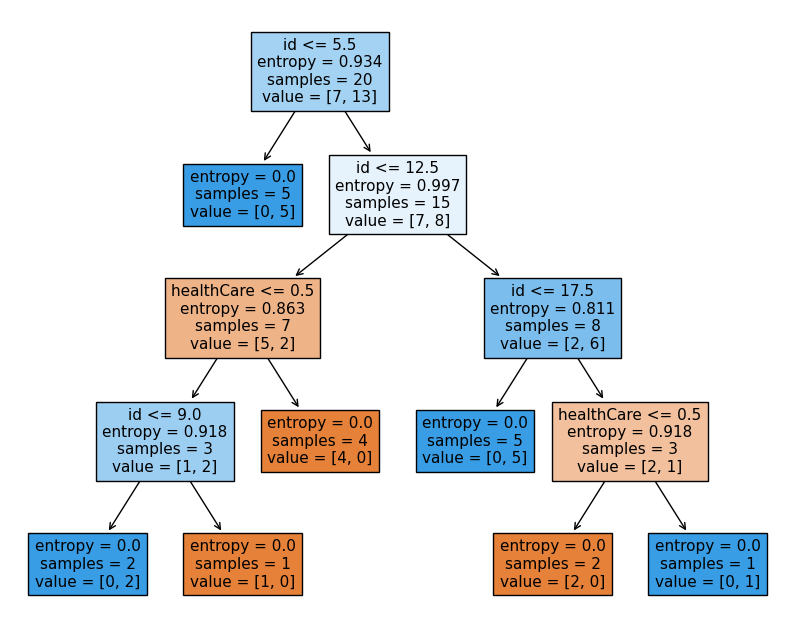

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot
from sklearn.tree import plot_tree

# convert data into a pandas dataframe
df = pd.DataFrame(data)

# create a mapping dictionary for the categorical features
mapping = {
    'roadCondition': {'good': 0, 'bad': 1},
    'poverty': {'low': 0, 'high': 1},
    'healthCare': {'weak': 0, 'strong': 1},
    'decision': {'no': 0, 'yes': 1}
}

# apply mapping to convert categorical features to numerical ones
df = df.replace(mapping)

# split the data into features and target variable
X = df.drop('decision', axis=1)
y = df['decision']

# create a decision tree classifier and fit it to the data
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

# visualize the decision tree using scikit-learn's plot_tree method
plt.figure(figsize=(10,8))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()
